In [6]:
from dataset.utils import get_prepared_dataframe, get_eeg_data, get_face_data

base_dir = 'UsabilitySmellsDataset'
df = get_prepared_dataframe(
    base_dir,
    normalize_cols=True,
    keep_only_log_cols=True,
    keep_only_norm_cols=True
)

In [38]:
# Load EEG/BVP data (use level='action' for finer granularity)
eeg_bvp_data = get_eeg_data(base_dir, level='action')

# Load Face data (use level='action' for finer granularity)
face_data = get_face_data(base_dir, level='action')

In [7]:
network, username = 'SN_2', 'L04'

log_df = df[(df['network'] == network) & (df['username'] == username)]
log_df

,network,username,pid,eid,rid,srid,task_id,unix_time,time,url,...,episode_total_events_norm_next_2,episode_total_events_norm_prev_3,episode_total_events_norm_next_3,sam_valence_norm,sam_arousal_norm,event_change,event_click,event_keypress,event_scroll,event_tabchange
697,SN_2,L04,0,0,0.000000,0.000000,0,1704723783893,1970-01-01 00:05:13.013000,https://social2.com/login,...,-1.024522,-0.339117,-1.024522,-0.125,-0.125,0,0,0,0,1
698,SN_2,L04,0,1,0.055556,0.004219,0,1704723830278,1970-01-01 00:05:59.398000,https://social2.com/login,...,0.000000,0.000000,0.000000,-0.125,-0.125,1,0,0,0,0
699,SN_2,L04,0,2,0.111111,0.008439,0,1704723834074,1970-01-01 00:06:03.194000,https://social2.com/login,...,0.000000,0.000000,0.000000,-0.125,-0.125,0,1,0,0,0
700,SN_2,L04,0,3,0.166667,0.012658,0,1704723858113,1970-01-01 00:06:27.233000,https://social2.com/login,...,0.000000,0.000000,0.000000,-0.125,-0.125,1,0,0,0,0
701,SN_2,L04,0,4,0.222222,0.016878,0,1704723858255,1970-01-01 00:06:27.375000,https://social2.com/login,...,0.000000,0.000000,0.000000,-0.125,-0.125,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,SN_2,L04,57,2,1.000000,0.983122,10,1704724932481,1970-01-01 00:24:21.601000,https://social2.com/vms8um9esuxipa3tkwyca9xg0re2,...,0.000000,0.000000,0.000000,0.000,0.625,0,0,0,1,0
931,SN_2,L04,58,0,0.000000,0.987342,10,1704724934172,1970-01-01 00:24:23.292000,https://social2.com/people,...,-0.909779,0.180203,1.876913,0.000,0.625,0,0,0,0,1
932,SN_2,L04,58,1,1.000000,0.991561,10,1704724934674,1970-01-01 00:24:23.794000,https://social2.com/vms8um9esuxipa3tkwyca9xg0re2,...,0.000000,0.000000,0.000000,0.000,0.625,0,1,0,0,0
933,SN_2,L04,59,0,0.000000,0.995781,11,1704724937712,1970-01-01 00:24:26.832000,https://social2.com/people/circles,...,1.876913,-0.783577,-1.030940,0.375,0.375,0,0,0,0,1


In [39]:
len(log_df), len(eeg_bvp_data[network][username]), len(face_data[network][username])

(238, 238, 238)

In [41]:
eeg_bvp_data[network][username][0]['eeg_signal'].shape, face_data[network][username][0]['emotions'].shape

((313013,), (7155, 7))

In [42]:
x_total = 0
y_total = 0

for i in range(len(eeg_bvp_data[network][username])):
    x = eeg_bvp_data[network][username][i]
    y = face_data[network][username][i]

    x_interval_a, x_interval_b = x['interval'].split('-')
    x_interval_a = "{:.3f}".format(float(x_interval_a))
    x_interval_b = "{:.3f}".format(float(x_interval_b))
    x_interval = x_interval_a + "-" + x_interval_b

    y_interval_a, y_interval_b = y['interval'].split('-')
    y_interval_a = "{:.3f}".format(float(y_interval_a))
    y_interval_b = "{:.3f}".format(float(y_interval_b))
    y_interval = y_interval_a + "-" + y_interval_b

    x_total += len(x['eeg_signal'])
    y_total += len(y['emotions'])
    
    print("{:20s} | {:20s} | {:7d} | {:7d}".format(x_interval, y_interval, x['eeg_signal'].shape[0], y['emotions'].shape[0]))

print("{:20s} | {:20s} | {:7d} | {:7d}".format('', '', x_total, y_total))

0.000-313.013        | 0.000-313.013        |  313013 |    7155
560.485-596.749      | 560.485-596.749      |   36264 |     800
596.749-596.759      | 596.749-596.759      |      10 |       0
596.759-596.759      | 596.759-596.759      |       0 |       0
596.759-598.022      | 596.759-598.022      |    1263 |       0
598.022-598.036      | 598.022-598.036      |      14 |       0
387.375-394.334      | 387.375-394.334      |    6959 |     177
598.036-598.033      | 598.036-598.033      |       0 |       0
598.033-601.134      | 598.033-601.134      |    3101 |      46
601.134-601.195      | 601.134-601.195      |      61 |       1
601.195-601.927      | 601.195-601.927      |     732 |       2
601.927-601.936      | 601.927-601.936      |       9 |       0
601.936-602.660      | 601.936-602.660      |     724 |       5
602.660-602.674      | 602.660-602.674      |      14 |       1
602.674-603.246      | 602.674-603.246      |     572 |      16
603.246-603.263      | 603.246-603.263  

In [43]:
eeg_signals = []
face_emotions = []

x_total = 0
y_total = 0

for i in range(len(eeg_bvp_data[network][username])):
    x = eeg_bvp_data[network][username][i]
    y = face_data[network][username][i]

    x_interval_a, x_interval_b = x['interval'].split('-')
    x_interval_a = "{:.3f}".format(float(x_interval_a))
    x_interval_b = "{:.3f}".format(float(x_interval_b))
    x_interval = x_interval_a + "-" + x_interval_b

    y_interval_a, y_interval_b = y['interval'].split('-')
    y_interval_a = "{:.3f}".format(float(y_interval_a))
    y_interval_b = "{:.3f}".format(float(y_interval_b))
    y_interval = y_interval_a + "-" + y_interval_b

    x_total += len(x['eeg_signal'])
    y_total += len(y['emotions'])

    eeg_signals.append(x['eeg_signal'])
    face_emotions.append(y['emotions'])
    
    print("{:20s} | {:20s} | {:7d} | {:7d}".format(x_interval, y_interval, x['eeg_signal'].shape[0], y['emotions'].shape[0]))

print("{:20s} | {:20s} | {:7d} | {:7d}".format('', '', x_total, y_total))

0.000-313.013        | 0.000-313.013        |  313013 |    7155
560.485-596.749      | 560.485-596.749      |   36264 |     800
596.749-596.759      | 596.749-596.759      |      10 |       0
596.759-596.759      | 596.759-596.759      |       0 |       0
596.759-598.022      | 596.759-598.022      |    1263 |       0
598.022-598.036      | 598.022-598.036      |      14 |       0
387.375-394.334      | 387.375-394.334      |    6959 |     177
598.036-598.033      | 598.036-598.033      |       0 |       0
598.033-601.134      | 598.033-601.134      |    3101 |      46
601.134-601.195      | 601.134-601.195      |      61 |       1
601.195-601.927      | 601.195-601.927      |     732 |       2
601.927-601.936      | 601.927-601.936      |       9 |       0
601.936-602.660      | 601.936-602.660      |     724 |       5
602.660-602.674      | 602.660-602.674      |      14 |       1
602.674-603.246      | 602.674-603.246      |     572 |      16
603.246-603.263      | 603.246-603.263  

In [49]:
import numpy as np

from biosppy.signals import tools as st
from biosppy.signals.eeg import get_power_features


def unroll(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]


def get_eeg_features(signal=None, sampling_rate=1000.0, size=0.25, overlap=0.5):
    # check inputs
    if signal is None:
        raise TypeError("Please specify an input signal.")

    # ensure numpy
    signal = np.array(signal)
    signal = np.reshape(signal, (signal.shape[0], -1))

    sampling_rate = float(sampling_rate)
    nch = signal.shape[1]

    # high pass filter
    b, a = st.get_filter(
        ftype="butter",
        band="highpass",
        order=8,
        frequency=4,
        sampling_rate=sampling_rate,
    )

    aux, _ = st._filter_signal(b, a, signal=signal, check_phase=True, axis=0)

    # low pass filter
    b, a = st.get_filter(
        ftype="butter",
        band="lowpass",
        order=16,
        frequency=40,
        sampling_rate=sampling_rate,
    )

    filtered, _ = st._filter_signal(b, a, signal=aux, check_phase=True, axis=0)

    # band power features
    out = get_power_features(
        signal=filtered, sampling_rate=sampling_rate,
        size=size, overlap=overlap
    )
    ts_feat = out["ts"]
    theta = out["theta"]
    alpha_low = out["alpha_low"]
    alpha_high = out["alpha_high"]
    beta = out["beta"]
    gamma = out["gamma"]

    return ts_feat, theta, alpha_low, alpha_high, beta, gamma


In [81]:
eeg_signals_flat = unroll(eeg_signals)
ts_feat, theta, alpha_low, alpha_high, beta, gamma = get_eeg_features(
    eeg_signals_flat,
    sampling_rate=1000.0,  # Sampling frequency (Hz)
    size=0.5,             # Window size (seconds)
    overlap=0.5            # Window overlap (0 to 1)
)

In [88]:
ts_feat.std()

425.36280470323214

In [102]:
print('eeg_singals:', len(eeg_signals)) 
print('eeg_signals_flat:', len(eeg_signals_flat))
print('ts_feat:     {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( ts_feat.shape[0], ts_feat.min(), ts_feat.max(), ts_feat.mean(), ts_feat.std() ))
print('theta:       {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( theta.shape[0], theta.min(), theta.max(), theta.mean(), theta.std() ))
print('alpha_low:   {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( alpha_low.shape[0], alpha_low.min(), alpha_low.max(), alpha_low.mean(), alpha_low.std() ))
print('alpha_high:  {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( alpha_high.shape[0], alpha_high.min(), alpha_high.max(), alpha_high.mean(), alpha_high.std() ))
print('beta:        {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( beta.shape[0], beta.min(), beta.max(), beta.mean(), beta.std() ))
print('gamma:       {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( gamma.shape[0], gamma.min(), gamma.max(), gamma.mean(), gamma.std() ))

print('')


from scipy.stats import zscore

ts_feat_ = zscore(ts_feat)
theta_ = zscore(theta)
alpha_low_ = zscore(alpha_low)
alpha_high_ = zscore(alpha_high)
beta_ = zscore(beta)
gamma_ = zscore(gamma)

print('ts_feat:     {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( ts_feat_.shape[0], ts_feat_.min(), ts_feat_.max(), ts_feat_.mean(), ts_feat.std() ))
print('theta:       {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( theta_.shape[0], theta_.min(), theta_.max(), theta_.mean(), theta.std() ))
print('alpha_low:   {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( alpha_low_.shape[0], alpha_low_.min(), alpha_low_.max(), alpha_low_.mean(), alpha_low.std() ))
print('alpha_high:  {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( alpha_high_.shape[0], alpha_high_.min(), alpha_high_.max(), alpha_high_.mean(), alpha_high.std() ))
print('beta:        {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( beta_.shape[0], beta_.min(), beta_.max(), beta_.mean(), beta.std() ))
print('gamma:       {:8d}  {:.2f} {:.2f} {:.2f} {:.2f} '.format( gamma_.shape[0], gamma_.min(), gamma_.max(), gamma_.mean(), gamma.std() ))


eeg_singals: 238
eeg_signals_flat: 1473752
ts_feat:         5894  0.00 1473.25 736.62 425.36 
theta:           5894  0.00 0.01 0.00 0.00 
alpha_low:       5894  0.00 0.00 0.00 0.00 
alpha_high:      5894  0.00 0.00 0.00 0.00 
beta:            5894  0.00 0.00 0.00 0.00 
gamma:           5894  0.00 0.00 0.00 0.00 

ts_feat:         5894  -1.73 1.73 0.00 425.36 
theta:           5894  -0.52 13.80 -0.00 0.00 
alpha_low:       5894  -0.53 15.81 0.00 0.00 
alpha_high:      5894  -0.59 17.35 -0.00 0.00 
beta:            5894  -1.17 10.64 -0.00 0.00 
gamma:           5894  -1.19 12.14 0.00 0.00 


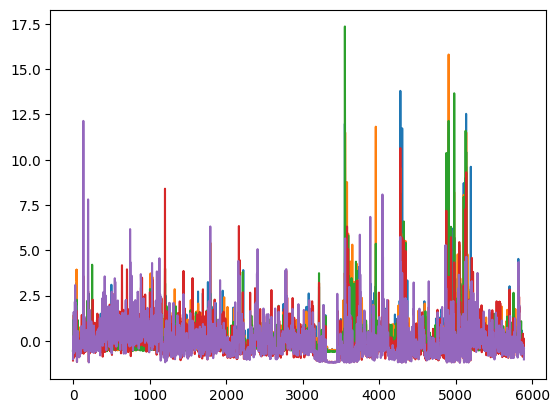

In [107]:
from matplotlib import pyplot as plt

plt.plot(theta_, label='theta')
plt.plot(alpha_low_, label='alpha_low')
plt.plot(alpha_high_, label='alpha_high')
plt.plot(beta_, label='beta')
plt.plot(gamma_, label='gamma')

f_eeg: (251,)
t_eeg: (5895,)
Sxx_eeg: (251, 5895)
0.0 0.9992495788111403


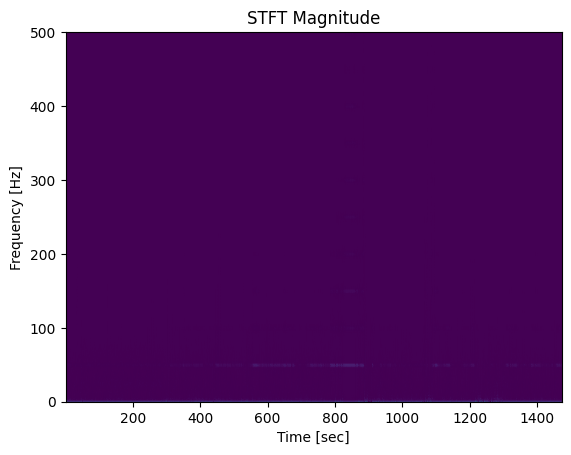

In [118]:
def safe_stft(signal, fs=256, nperseg=256, noverlap=128, window='hann', return_db=False):
    """
    A version of STFT that adjusts nperseg/noverlap if the signal is too short.
    Returns f, t, magnitude_spectrogram
    """
    length = len(signal)
    if length <= 1:
        # Return a dummy
        return np.array([]), np.array([]), np.array([[]])

    # Adjust nperseg if needed
    if length < nperseg:
        nperseg = length
    # Adjust overlap
    if noverlap >= nperseg:
        noverlap = max(0, nperseg // 2)

    f, t, Zxx = stft(
        signal,
        fs=fs,
        window=window,
        nperseg=nperseg,
        noverlap=noverlap,
        boundary=None
    )
    Sxx = np.abs(Zxx)
    if return_db:
        Sxx = 10 * np.log10(Sxx + 1e-10)
    return f, t, Sxx

f_eeg, t_eeg, Sxx_eeg = safe_stft(
    eeg_signals_flat, 
    fs=1000.0,  # Sampling rate for EEG in Hz.
    nperseg=500,   # Window size (samples) for EEG STFT.
    noverlap=250,  # Overlap (samples) for EEG STFT.
    window='hann',  # Window function for both STFT calls. 
    return_db=False
)

print('f_eeg:', f_eeg.shape )
print('t_eeg:', t_eeg.shape )
print('Sxx_eeg:', Sxx_eeg.shape)

vmin, vmax = np.min(Sxx_eeg), np.max(Sxx_eeg)
print(vmin, vmax)
amp = 2 * np.sqrt(2)

plt.pcolormesh(t_eeg, f_eeg, Sxx_eeg, vmin=vmin, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

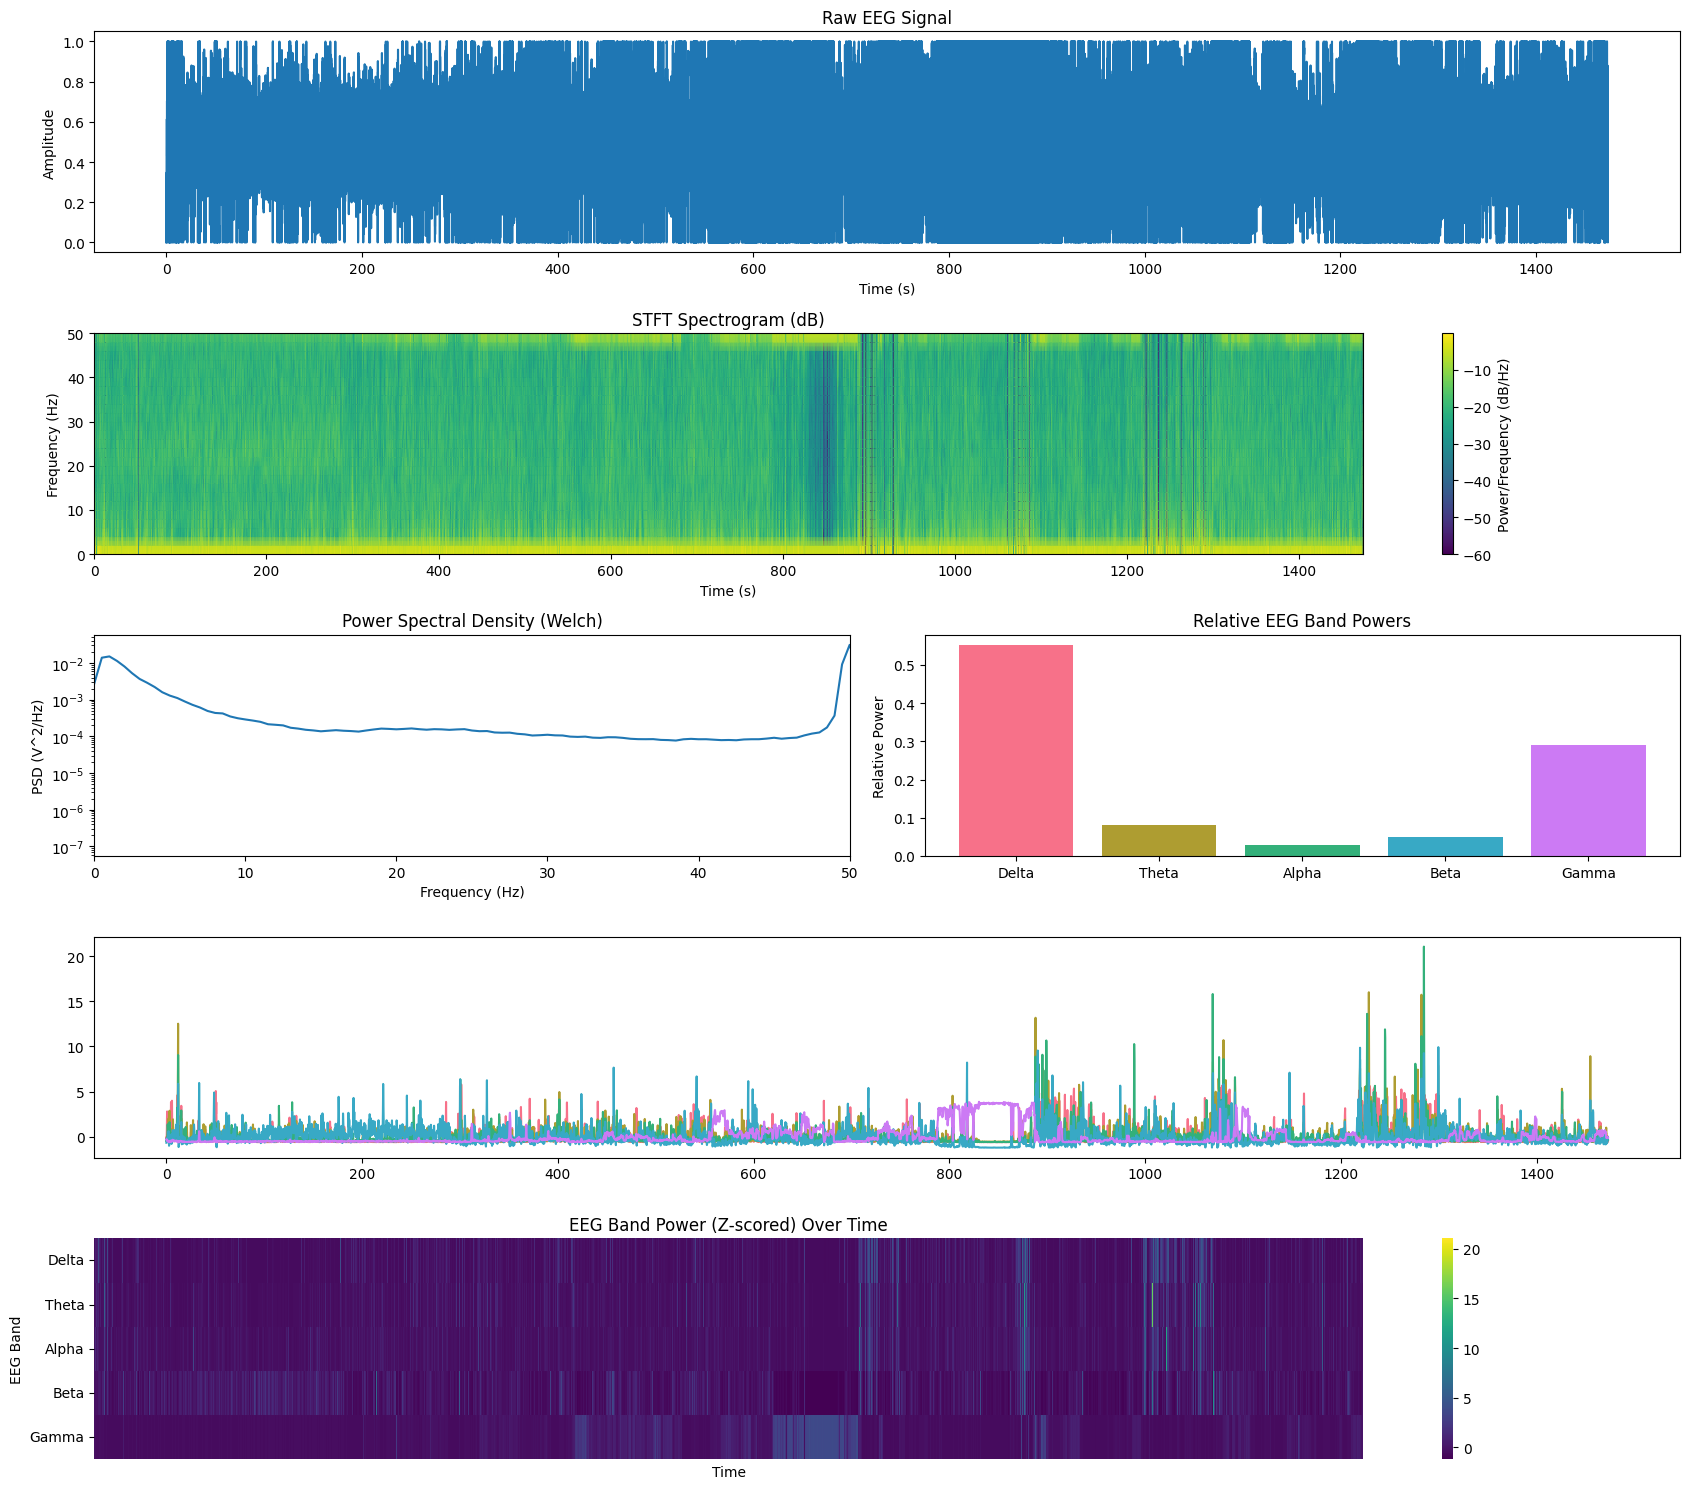

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft, welch
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import zscore

def enhanced_eeg_visualization(eeg_signals_flat, sampling_rate=1000.0):
    """
    Comprehensive visualization of EEG signals with multiple plots.
    
    Parameters:
    -----------
    eeg_signals_flat : array-like
        Flattened EEG signal
    sampling_rate : float
        Sampling rate in Hz
    """
    # Calculate the duration of the signal
    duration = len(eeg_signals_flat) / sampling_rate
    
    # Create a time vector
    time = np.arange(0, len(eeg_signals_flat)) / sampling_rate
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(17, 15))
    gs = GridSpec(5, 2, figure=fig)
    
    # 1. Raw signal plot
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(time, eeg_signals_flat)
    ax1.set_title('Raw EEG Signal')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')
    
    # 2. Spectrogram with dB scale
    ax2 = fig.add_subplot(gs[1, :])
    f, t, Sxx = stft(
        eeg_signals_flat,
        fs=sampling_rate,
        nperseg=int(sampling_rate * 0.5),  # 1-second windows
        noverlap=int(sampling_rate * 0.25),  # 75% overlap
        window='hann',
    )
    
    # Convert to dB
    Sxx_db = 10 * np.log10(np.abs(Sxx) + 1e-10)
    
    # Colormap and limits for better visualization
    vmin = np.max(Sxx_db) - 60  # 60dB below maximum
    vmax = np.max(Sxx_db)
    
    im = ax2.pcolormesh(t, f, Sxx_db, vmin=vmin, vmax=vmax, cmap='viridis', shading='gouraud')
    ax2.set_title('STFT Spectrogram (dB)')
    ax2.set_ylabel('Frequency (Hz)')
    ax2.set_xlabel('Time (s)')
    
    # Only show frequencies up to 50 Hz which is typical for EEG analysis
    ax2.set_ylim(0, 50)
    
    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax2)
    cbar.set_label('Power/Frequency (dB/Hz)')
    
    # 3. Power Spectral Density using Welch's method
    ax3 = fig.add_subplot(gs[2, 0])
    f_welch, Pxx = welch(
        eeg_signals_flat,
        fs=sampling_rate,
        nperseg=int(sampling_rate * 2),  # 2-second windows
        noverlap=int(sampling_rate),  # 1-second overlap
        scaling='density'
    )
    
    ax3.semilogy(f_welch, Pxx)
    ax3.set_title('Power Spectral Density (Welch)')
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_ylabel('PSD (V^2/Hz)')
    ax3.set_xlim(0, 50)  # Only show frequencies up to 50 Hz
    
    # 4. EEG frequency bands visualization
    ax4 = fig.add_subplot(gs[2, 1])
    
    # Define frequency bands
    bands = {
        'Delta': (0.5, 4),
        'Theta': (4, 8),
        'Alpha': (8, 13),
        'Beta': (13, 30),
        'Gamma': (30, 50)
    }
    
    # Calculate band powers
    band_powers = {}
    for band, (fmin, fmax) in bands.items():
        idx = np.logical_and(f_welch >= fmin, f_welch <= fmax)
        band_powers[band] = np.trapz(Pxx[idx], f_welch[idx])
    
    # Normalize for better visualization
    total_power = sum(band_powers.values())
    for band in band_powers:
        band_powers[band] /= total_power
    
    # Create bar plot
    ax4.bar(band_powers.keys(), band_powers.values(), color=sns.color_palette("husl", len(bands)))
    ax4.set_title('Relative EEG Band Powers')
    ax4.set_ylabel('Relative Power')
    
    # 5. Time-frequency band evolution
    ax5 = fig.add_subplot(gs[3, :])
    
    # Function to extract EEG bands
    def get_eeg_bands(signal, sampling_rate):
        # Calculate the window size (1 second) and step size (0.25 seconds)
        window_size = int(sampling_rate)
        step_size = int(sampling_rate * 0.25)
        
        # Create a time array for the band powers
        time_bands = np.arange(0, len(signal) - window_size + 1, step_size) / sampling_rate
        
        # Initialize arrays for each band
        band_data = {band: [] for band in bands}
        
        # Process each window
        for i in range(0, len(signal) - window_size + 1, step_size):
            window = signal[i:i+window_size]
            f, Pxx = welch(window, fs=sampling_rate, nperseg=window_size)
            
            # Calculate power in each band
            for band, (fmin, fmax) in bands.items():
                idx = np.logical_and(f >= fmin, f <= fmax)
                power = np.trapz(Pxx[idx], f[idx])
                band_data[band].append(power)
        
        # Convert lists to arrays
        for band in band_data:
            band_data[band] = np.array(band_data[band])
            # Z-score normalize for better visualization
            if len(band_data[band]) > 1:  # Ensure more than one point for z-score
                band_data[band] = zscore(band_data[band])
        
        return time_bands, band_data
    
    # Get band evolution over time
    time_bands, band_data = get_eeg_bands(eeg_signals_flat, sampling_rate)
    
    # Plot each band
    colors = sns.color_palette("husl", len(bands))
    for i, (band, values) in enumerate(band_data.items()):
        ax5.plot(time_bands, values, label=band, color=colors[i])
    

    ax6 = fig.add_subplot(gs[4, :])
    feature_matrix = np.vstack([band_data['Delta'], band_data['Theta'], band_data['Alpha'], band_data['Beta'], band_data['Gamma']])
    
    sns.heatmap(feature_matrix, cmap="viridis", xticklabels=False, yticklabels=list(bands.keys()), ax=ax6)
    ax6.set_xlabel("Time")
    ax6.set_ylabel("EEG Band")
    ax6.set_title("EEG Band Power (Z-scored) Over Time")
    
    plt.tight_layout()
    return fig


# Usage example:
fig1 = enhanced_eeg_visualization(eeg_signals_flat, sampling_rate=1000.0)

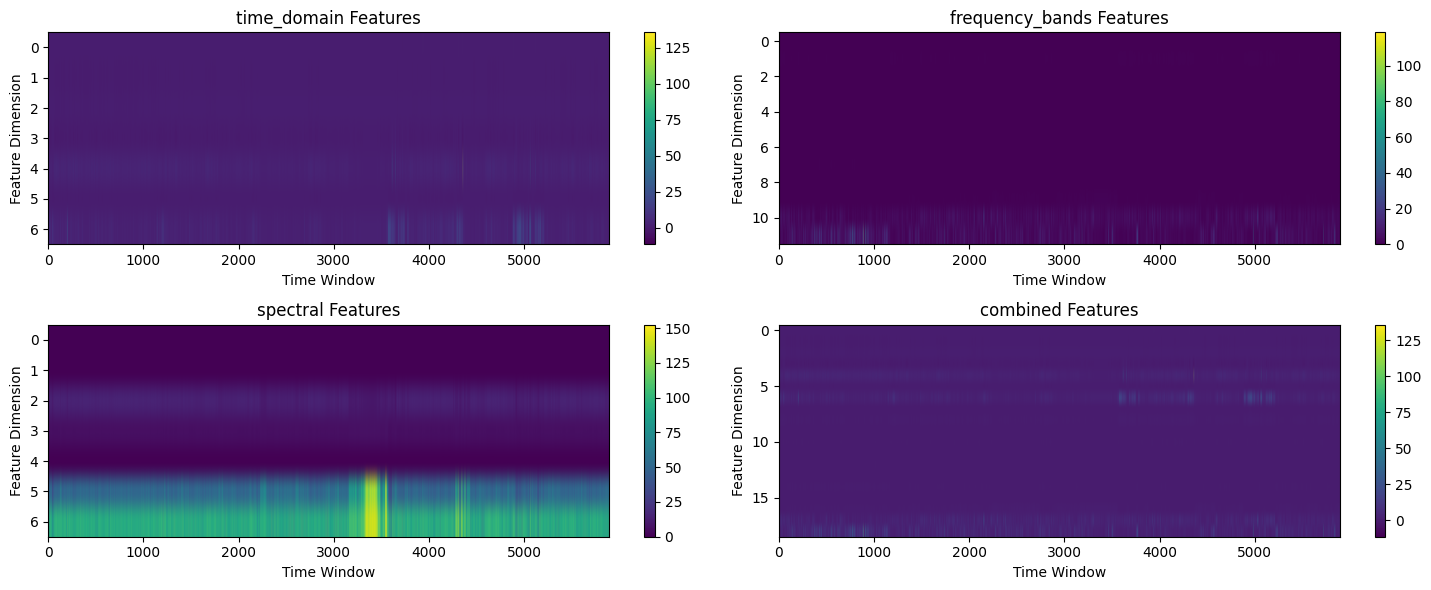

In [130]:
def feature_extraction_comparison(eeg_signals_flat, sampling_rate=1000.0):
    """
    Extracts and compares different feature sets for neural network input
    
    Parameters:
    -----------
    eeg_signals_flat : array-like
        Flattened EEG signal
    sampling_rate : float
        Sampling rate in Hz
    
    Returns:
    --------
    dict
        Dictionary containing different feature sets
    """
    features = {}
    
    # 1. Time-domain features
    def extract_time_features(signal, window_size=1000, step=250):
        time_features = []
        
        for i in range(0, len(signal) - window_size + 1, step):
            window = signal[i:i+window_size]
            
            # Statistical features
            mean = np.mean(window)
            std = np.std(window)
            ptp = np.ptp(window)  # peak-to-peak
            skew = np.mean((window - mean)**3) / (std**3) if std > 0 else 0
            kurtosis = np.mean((window - mean)**4) / (std**4) if std > 0 else 0
            
            # Hjorth parameters
            diff1 = np.diff(window)
            diff2 = np.diff(diff1)
            
            mobility1 = np.std(diff1) / np.std(window) if np.std(window) > 0 else 0
            mobility2 = np.std(diff2) / np.std(diff1) if np.std(diff1) > 0 else 0
            
            complexity = mobility2 / mobility1 if mobility1 > 0 else 0
            
            # Combine features
            time_features.append([mean, std, ptp, skew, kurtosis, mobility1, complexity])
        
        return np.array(time_features)
    
    features['time_domain'] = extract_time_features(eeg_signals_flat)
    
    # 2. Frequency-domain features (traditional bands)
    def extract_band_powers(signal, sampling_rate, window_size=1000, step=250):
        bands = {
            'Delta': (0.5, 4),
            'Theta': (4, 8),
            'Alpha': (8, 13),
            'Beta': (13, 30),
            'Gamma': (30, 50)
        }
        
        band_powers = []
        
        for i in range(0, len(signal) - window_size + 1, step):
            window = signal[i:i+window_size]
            
            f, Pxx = welch(window, fs=sampling_rate, nperseg=window_size)
            
            # Calculate absolute and relative powers for each band
            powers = []
            total_power = 0
            band_absolute = {}
            
            for band, (fmin, fmax) in bands.items():
                idx = np.logical_and(f >= fmin, f <= fmax)
                power = np.trapz(Pxx[idx], f[idx])
                band_absolute[band] = power
                total_power += power
            
            # Add absolute and relative powers to features
            for band in bands:
                powers.append(band_absolute[band])  # Absolute power
                powers.append(band_absolute[band] / total_power if total_power > 0 else 0)  # Relative power
                
            # Add ratios between bands (often useful for EEG)
            powers.append(band_absolute['Theta'] / band_absolute['Alpha'] 
                         if band_absolute['Alpha'] > 0 else 0)  # Theta/Alpha ratio
            powers.append(band_absolute['Beta'] / band_absolute['Alpha'] 
                         if band_absolute['Alpha'] > 0 else 0)  # Beta/Alpha ratio
            
            band_powers.append(powers)
            
        return np.array(band_powers)
    
    features['frequency_bands'] = extract_band_powers(eeg_signals_flat, sampling_rate)
    
    # 3. Spectral features from STFT
    def extract_spectral_features(signal, sampling_rate, window_size=1000, step=250):
        spectral_features = []
        
        for i in range(0, len(signal) - window_size + 1, step):
            window = signal[i:i+window_size]
            
            f, t, Sxx = stft(
                window,
                fs=sampling_rate,
                nperseg=window_size,
                noverlap=window_size//2,
                window='hann',
            )
            
            # Get mean power across time for each frequency bin (compress the spectrogram)
            mean_spectrum = np.mean(np.abs(Sxx), axis=1)
            
            # Extract features from the spectrum
            spectral_mean = np.mean(mean_spectrum)
            spectral_std = np.std(mean_spectrum)
            spectral_skew = np.mean((mean_spectrum - spectral_mean)**3) / (spectral_std**3) if spectral_std > 0 else 0
            
            # Get spectral entropy
            normalized_spectrum = mean_spectrum / np.sum(mean_spectrum) if np.sum(mean_spectrum) > 0 else np.zeros_like(mean_spectrum)
            spectral_entropy = -np.sum(normalized_spectrum * np.log2(normalized_spectrum + 1e-10))
            
            # Find dominant frequency
            dominant_freq = f[np.argmax(mean_spectrum)]
            
            # Centroid and spread
            centroid = np.sum(f * mean_spectrum) / np.sum(mean_spectrum) if np.sum(mean_spectrum) > 0 else 0
            spread = np.sqrt(np.sum(((f - centroid)**2) * mean_spectrum) / np.sum(mean_spectrum)) if np.sum(mean_spectrum) > 0 else 0
            
            spectral_features.append([spectral_mean, spectral_std, spectral_skew, spectral_entropy, 
                                     dominant_freq, centroid, spread])
            
        return np.array(spectral_features)
    
    features['spectral'] = extract_spectral_features(eeg_signals_flat, sampling_rate)
    
    # 4. Combined features (concatenate time-domain and frequency-domain)
    # This is often the most effective approach for neural networks
    time_feats = features['time_domain']
    freq_feats = features['frequency_bands']
    
    # Make sure they have the same number of windows
    min_windows = min(len(time_feats), len(freq_feats))
    
    features['combined'] = np.hstack((time_feats[:min_windows], freq_feats[:min_windows]))
    
    return features

def visualize_features_for_nn(features):
    """
    Visualize different feature sets for neural network comparison
    
    Parameters:
    -----------
    features : dict
        Dictionary containing feature sets from feature_extraction_comparison()
    """
    fig, axs = plt.subplots(2, 2, figsize=(15, 6))
    
    # Flatten axes for easier iteration
    axs = axs.flatten()
    
    # Plot each feature set
    for i, (feature_name, feature_data) in enumerate(features.items()):
        # Use PCA to reduce dimensionality for visualization if needed
        # if feature_data.shape[1] > 10:
        #     from sklearn.decomposition import PCA
        #     pca = PCA(n_components=10)
        #     feature_data = pca.fit_transform(feature_data)
        #     title_suffix = " (PCA reduced to 10 dimensions)"
        # else:
        title_suffix = ""
        
        # Create heatmap
        im = axs[i].imshow(feature_data.T, aspect='auto', cmap='viridis')
        axs[i].set_title(f'{feature_name} Features{title_suffix}')
        axs[i].set_xlabel('Time Window')
        axs[i].set_ylabel('Feature Dimension')
        
        # Add colorbar
        plt.colorbar(im, ax=axs[i])
    
    plt.tight_layout()
    return fig


features = feature_extraction_comparison(eeg_signals_flat, sampling_rate=1000.0)
fig2 = visualize_features_for_nn(features)

Extracted features: ['theta_abs', 'alpha_low_abs', 'alpha_high_abs', 'beta_abs', 'gamma_abs', 'theta_rel', 'alpha_low_rel', 'alpha_high_rel', 'beta_rel', 'gamma_rel', 'spectral_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_skewness', 'dominant_freq', 'activity', 'mobility', 'complexity', 'baseline', 'peak_to_peak', 'theta_beta_ratio', 'alpha_beta_ratio', 'theta_alpha_ratio']
Feature matrix shape: (2946, 23)


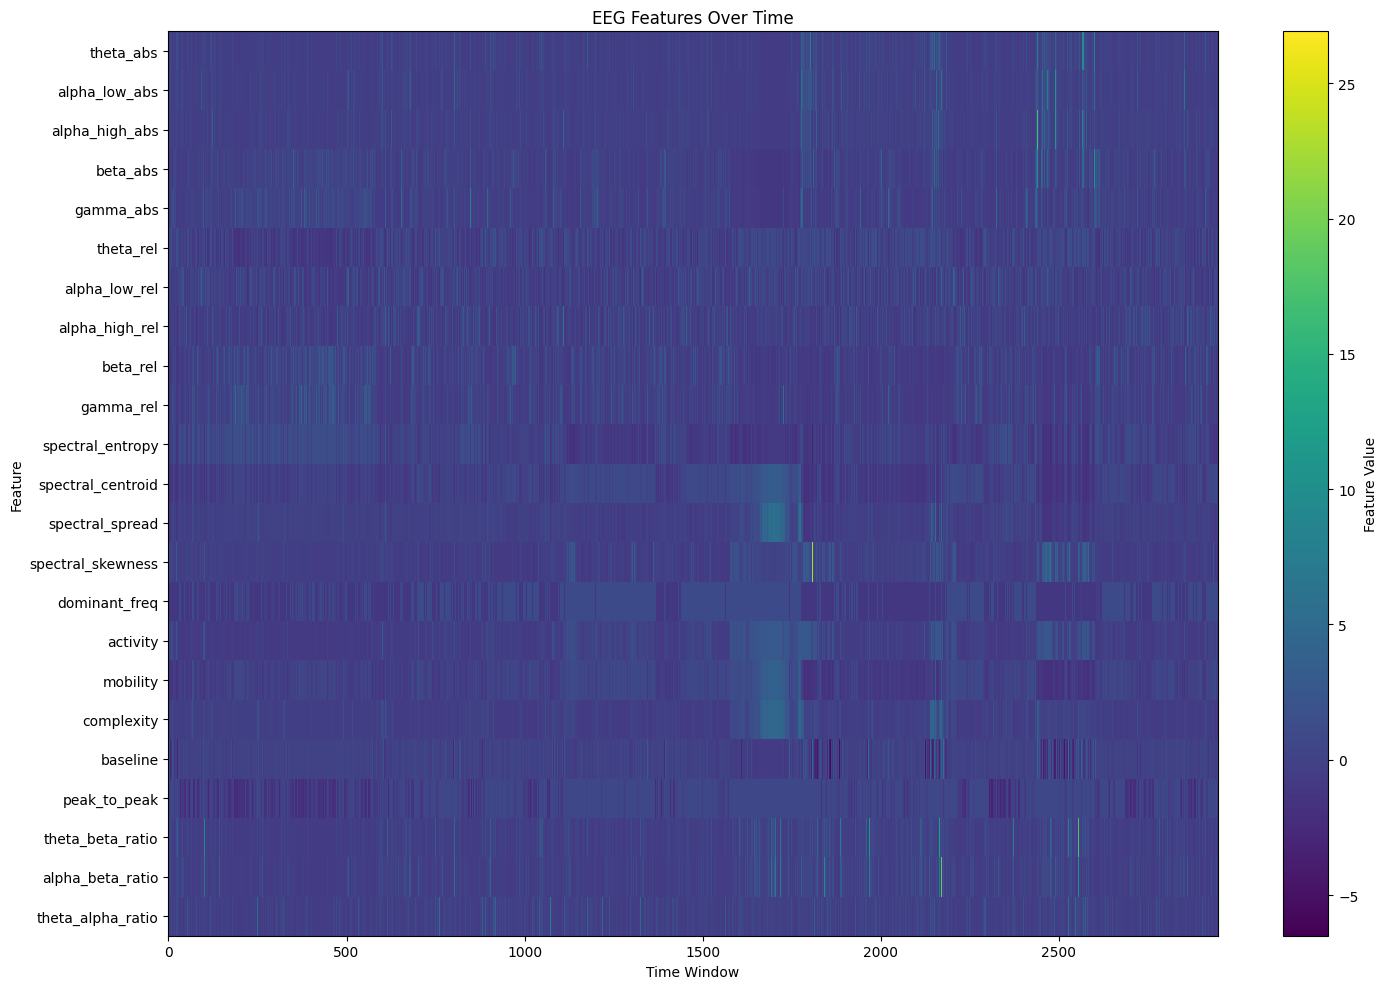

In [141]:
from dataset.eeg_features import get_eeg_features
from scipy.stats import zscore

def extract_combined_eeg_features(eeg_signal, sampling_rate=1000.0, size=1.0, overlap=0.5):
    """
    Extract a comprehensive set of EEG features for emotion recognition,
    using biosppy for band extraction and adding additional features.
    
    Parameters
    ----------
    eeg_signal : array
        Raw EEG signal.
    sampling_rate : float, optional
        Sampling frequency (Hz).
    size : float, optional
        Window size (seconds).
    overlap : float, optional
        Window overlap (0 to 1).
    
    Returns
    -------
    combined_features : array
        Matrix of extracted features with shape [n_windows, n_features].
        Each row represents a time window, each column a feature.
    feature_names : list
        Names of the extracted features.
    """
    # Reshape signal to 2D if needed (assuming single channel)
    if eeg_signal.ndim == 1:
        eeg_signal = eeg_signal.reshape(-1, 1)
    
    # Extract frequency bands using biosppy's function
    ts_feat, theta, alpha_low, alpha_high, beta, gamma = get_eeg_features(
        signal=eeg_signal, 
        sampling_rate=sampling_rate, 
        size=size, 
        overlap=overlap
    )
    
    # Number of windows
    n_windows = len(ts_feat)
    
    # Initialize additional feature arrays
    spectral_features = np.zeros((n_windows, 5))
    temporal_features = np.zeros((n_windows, 5))
    emotion_ratios = np.zeros((n_windows, 3))
    
    # Window size in samples
    win_samples = int(size * sampling_rate)
    # Overlap in samples
    overlap_samples = int(win_samples * overlap)
    # Step size in samples
    step_samples = win_samples - overlap_samples
    
    # Process each window for additional features
    for i in range(n_windows):
        # Calculate window indices
        start_idx = int(ts_feat[i] * sampling_rate)
        end_idx = start_idx + win_samples
        
        # Ensure we don't go out of bounds
        if end_idx > eeg_signal.shape[0]:
            end_idx = eeg_signal.shape[0]
        
        # Extract window - use first channel
        window = eeg_signal[start_idx:end_idx, 0]
        
        # Skip if window is too small
        if len(window) < win_samples / 2:
            continue
            
        # Calculate PSD using Welch's method for spectral features
        f, Pxx = welch(window, fs=sampling_rate, nperseg=min(len(window), 256), 
                      noverlap=min(len(window), 256) // 2)
        
        # 1. SPECTRAL FEATURES
        # Normalize PSD for spectral features
        norm_psd = Pxx / np.sum(Pxx) if np.sum(Pxx) > 0 else np.zeros_like(Pxx)
        
        # Spectral entropy
        spectral_entropy = -np.sum(norm_psd * np.log2(norm_psd + 1e-10))
        
        # Spectral centroid
        spectral_centroid = np.sum(f * norm_psd) if np.any(norm_psd) else 0
        
        # Spectral spread
        spectral_spread = np.sqrt(np.sum(((f - spectral_centroid)**2) * norm_psd)) if spectral_centroid > 0 else 0
        
        # Spectral skewness
        spectral_skewness = np.sum(((f - spectral_centroid)**3) * norm_psd) / (spectral_spread**3) if spectral_spread > 0 else 0
        
        # Dominant frequency
        dominant_freq = f[np.argmax(Pxx)] if len(Pxx) > 0 else 0
        
        spectral_features[i] = [
            spectral_entropy,
            spectral_centroid,
            spectral_spread,
            spectral_skewness,
            dominant_freq
        ]
        
        # 2. TEMPORAL FEATURES
        # Hjorth parameters
        baseline = np.mean(window)
        activity = np.var(window)
        mobility = np.sqrt(np.var(np.diff(window)) / activity) if activity > 0 else 0
        complexity = np.sqrt(np.var(np.diff(np.diff(window))) / np.var(np.diff(window))) if np.var(np.diff(window)) > 0 else 0
        
        # Zero crossing rate
        zero_crossings = np.sum(np.diff(np.signbit(window).astype(int)) != 0)
        zcr = zero_crossings / (len(window) - 1) if len(window) > 1 else 0
        
        # Peak-to-peak
        ptp = np.ptp(window)
        
        temporal_features[i] = [
            activity,
            mobility,
            complexity,
            baseline,
            ptp
        ]
        
        # 3. EMOTION-SPECIFIC RATIOS
        # Extract relevant band powers for this window (first channel)
        theta_i = theta[i, 0] if theta.ndim > 1 else theta[i]
        alpha_low_i = alpha_low[i, 0] if alpha_low.ndim > 1 else alpha_low[i]
        alpha_high_i = alpha_high[i, 0] if alpha_high.ndim > 1 else alpha_high[i]
        beta_i = beta[i, 0] if beta.ndim > 1 else beta[i]
        gamma_i = gamma[i, 0] if gamma.ndim > 1 else gamma[i]
        
        # Calculate alpha total
        alpha_total = alpha_low_i + alpha_high_i
        
        # Calculate key emotion-related ratios
        theta_beta_ratio = theta_i / beta_i if beta_i > 0 else 0
        alpha_beta_ratio = alpha_total / beta_i if beta_i > 0 else 0
        theta_alpha_ratio = theta_i / alpha_total if alpha_total > 0 else 0
        
        emotion_ratios[i] = [
            theta_beta_ratio,  # Related to attention and relaxation
            alpha_beta_ratio,  # Related to relaxation vs. activation
            theta_alpha_ratio  # Related to drowsiness/meditation
        ]
    
    # Concatenate all features
    # First, prepare band power features
    band_powers = np.column_stack([
        theta.flatten() if theta.ndim > 1 else theta,
        alpha_low.flatten() if alpha_low.ndim > 1 else alpha_low,
        alpha_high.flatten() if alpha_high.ndim > 1 else alpha_high,
        beta.flatten() if beta.ndim > 1 else beta,
        gamma.flatten() if gamma.ndim > 1 else gamma
    ])
    
    # Calculate relative band powers
    total_power = np.sum(band_powers, axis=1, keepdims=True)
    relative_powers = band_powers / total_power
    
    # Combine all features
    combined_features = np.column_stack([
        band_powers,          # Absolute band powers
        relative_powers,      # Relative band powers
        spectral_features,    # Spectral features
        temporal_features,    # Temporal features
        emotion_ratios        # Emotion-specific ratios
    ])
    
    # Create feature names for reference
    feature_names = [
        'theta_abs', 'alpha_low_abs', 'alpha_high_abs', 'beta_abs', 'gamma_abs',
        'theta_rel', 'alpha_low_rel', 'alpha_high_rel', 'beta_rel', 'gamma_rel',
        'spectral_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_skewness', 'dominant_freq',
        'activity', 'mobility', 'complexity', 'baseline', 'peak_to_peak',
        'theta_beta_ratio', 'alpha_beta_ratio', 'theta_alpha_ratio'
    ]
    
    return combined_features, feature_names


def format_features_for_model(combined_features, batch_size, sequence_length):
    """
    Reshape feature matrix to match the expected input format of the neural network.
    
    Parameters
    ----------
    combined_features : array
        Matrix of extracted features with shape [n_windows, n_features].
    batch_size : int
        Number of samples in a batch.
    sequence_length : int
        Number of time steps per sample.
    
    Returns
    -------
    model_input : array
        Reshaped features with shape [batch_size, sequence_length, n_features].
    """
    n_windows = combined_features.shape[0]
    n_features = combined_features.shape[1]
    
    # Calculate how many complete sequences we can form
    n_sequences = n_windows // sequence_length
    n_samples = n_sequences // batch_size
    
    # Truncate to fit evenly into batches and sequences
    usable_windows = n_samples * batch_size * sequence_length
    if usable_windows == 0:
        raise ValueError(f"Not enough windows ({n_windows}) to form a complete sequence of length {sequence_length} and batch size {batch_size}")
    
    truncated_features = combined_features[:usable_windows]
    
    # Reshape to [batch_size, sequence_length, n_features]
    model_input = truncated_features.reshape(batch_size, sequence_length, n_features)
    
    return model_input


def compute_emotion_features_from_eeg(eeg_signals_flat, sampling_rate=1000.0, size=1.0, overlap=0.5, z_normalize=True):
    """
    Compute comprehensive EEG features optimized for emotion detection.
    
    Parameters
    ----------
    eeg_signals_flat : array
        Raw EEG signal.
    sampling_rate : float, optional
        Sampling frequency (Hz).
    size : float, optional
        Window size (seconds).
    overlap : float, optional
        Window overlap (0 to 1).
    
    Returns
    -------
    features : array
        Matrix of extracted features.
    feature_names : list
        Names of the extracted features.
    """
    # Extract combined features
    features, feature_names = extract_combined_eeg_features(
        eeg_signals_flat, 
        sampling_rate=sampling_rate,
        size=size,
        overlap=overlap
    )
    
    if z_normalize:
        features = zscore(features, axis=0)
    
    return features, feature_names



features, feature_names = compute_emotion_features_from_eeg(
    np.array(eeg_signals_flat), 
    sampling_rate=1000.0, 
    size=1.0, 
    overlap=0.5
)

# 2. Display feature names
print("Extracted features:", feature_names)
print("Feature matrix shape:", features.shape)

# 3. Visualize features
plt.figure(figsize=(15, 10))
plt.imshow(features.T, aspect='auto', interpolation='none')
plt.colorbar(label='Feature Value')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Time Window')
plt.ylabel('Feature')
plt.title('EEG Features Over Time')
plt.tight_layout()
plt.show()


---

## face

In [145]:
emotions_names = ['anger', 'disgust', 'fear', 'enjoyment', 'contempt', 'sadness', 'surprise']
face_emotions_flat = np.array(unroll(face_emotions))
len(face_emotions), face_emotions_flat.shape

(238, (22691, 7))

In [146]:
face_emotions_flat[0].shape

(7,)

(44, 32) 32
['anger_mean', 'disgust_mean', 'fear_mean', 'enjoyment_mean', 'contempt_mean', 'sadness_mean', 'surprise_mean', 'anger_std', 'disgust_std', 'fear_std', 'enjoyment_std', 'contempt_std', 'sadness_std', 'surprise_std', 'valence', 'arousal', 'quadrant_excitedhappy', 'quadrant_contentrelaxed', 'quadrant_angryafraid', 'quadrant_sadbored', 'emotion_entropy', 'dominant_confidence', 'anger_trend', 'disgust_trend', 'fear_trend', 'enjoyment_trend', 'contempt_trend', 'sadness_trend', 'surprise_trend', 'positive_negative_ratio', 'high_low_arousal_ratio', 'primary_blend_ratio']


<Figure size 640x480 with 0 Axes>

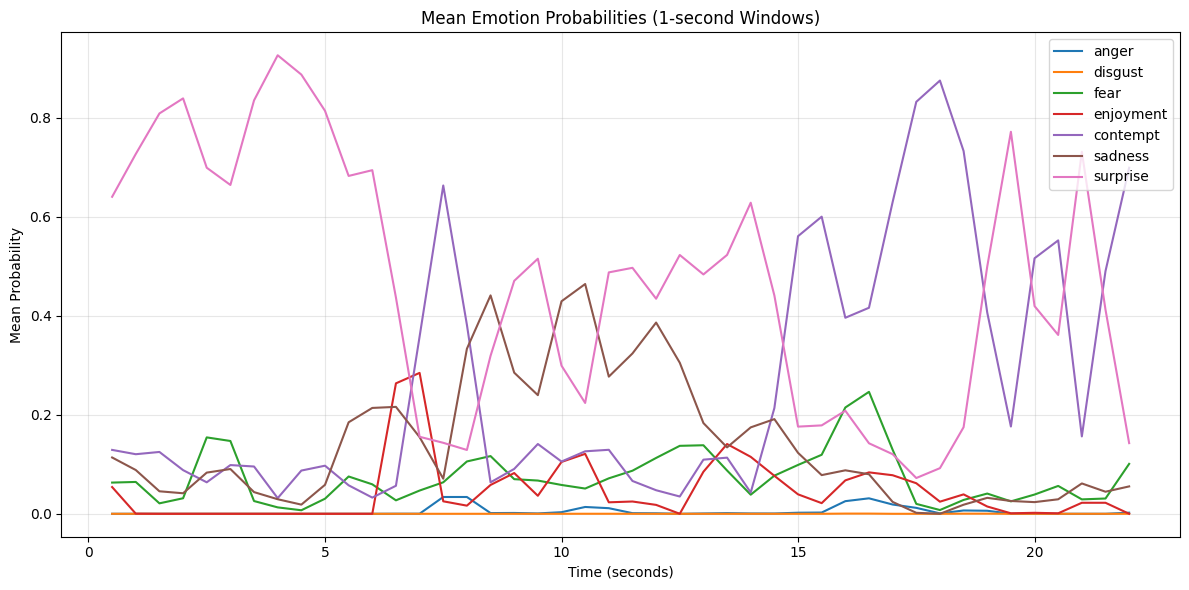

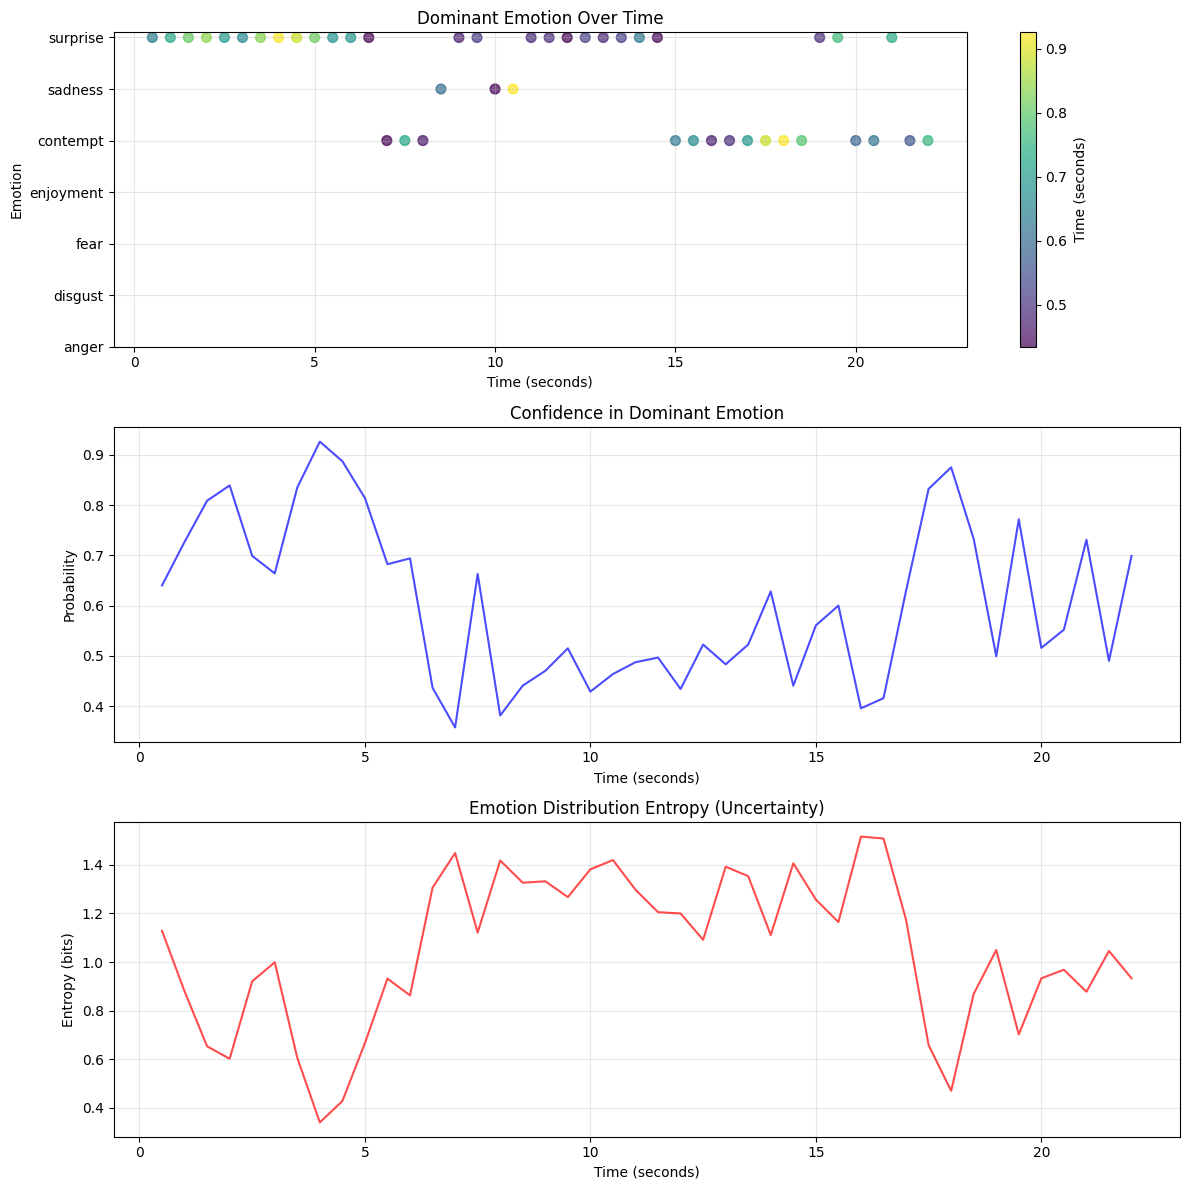

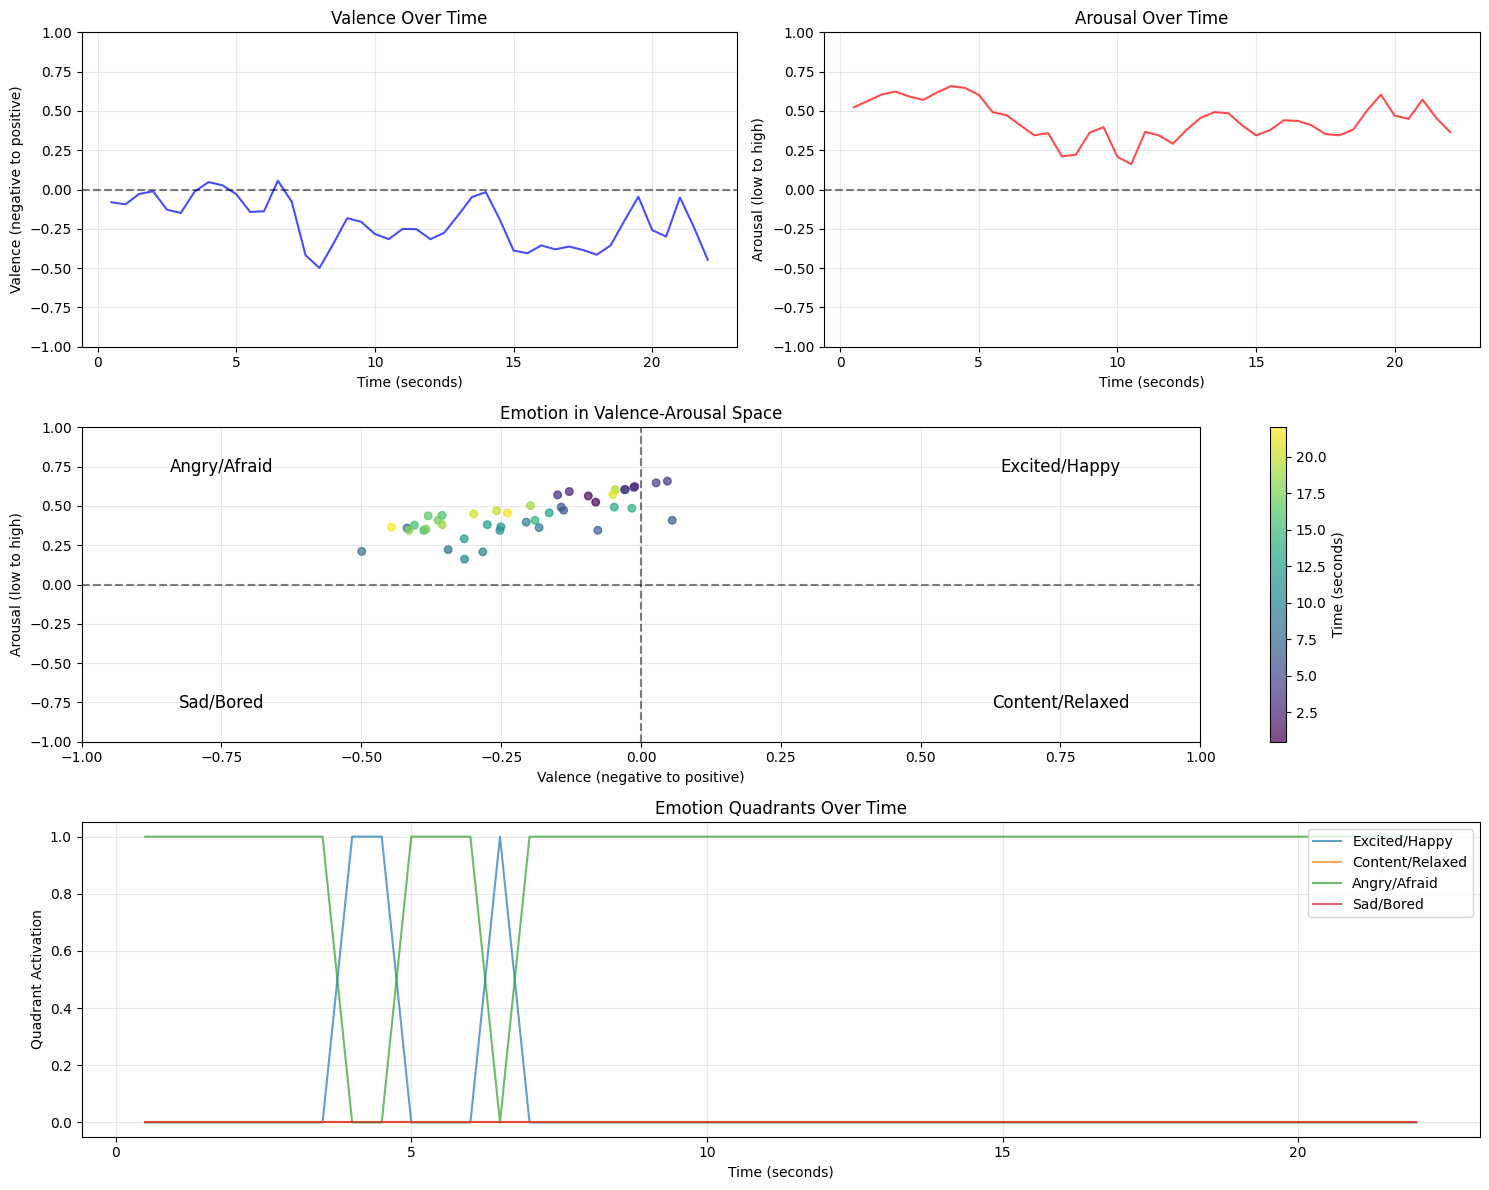

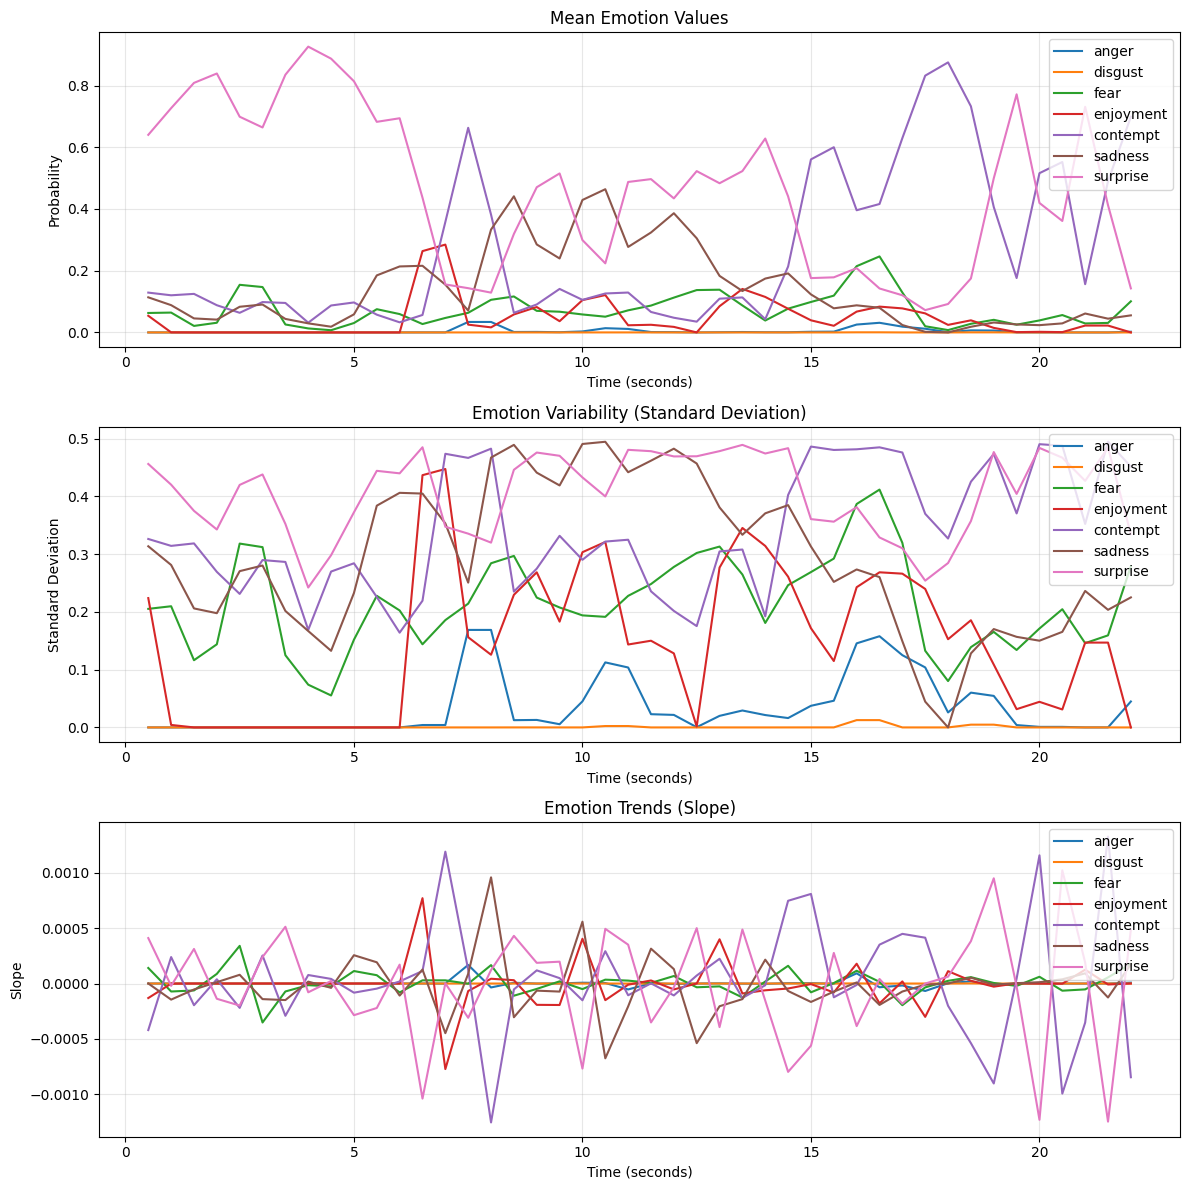

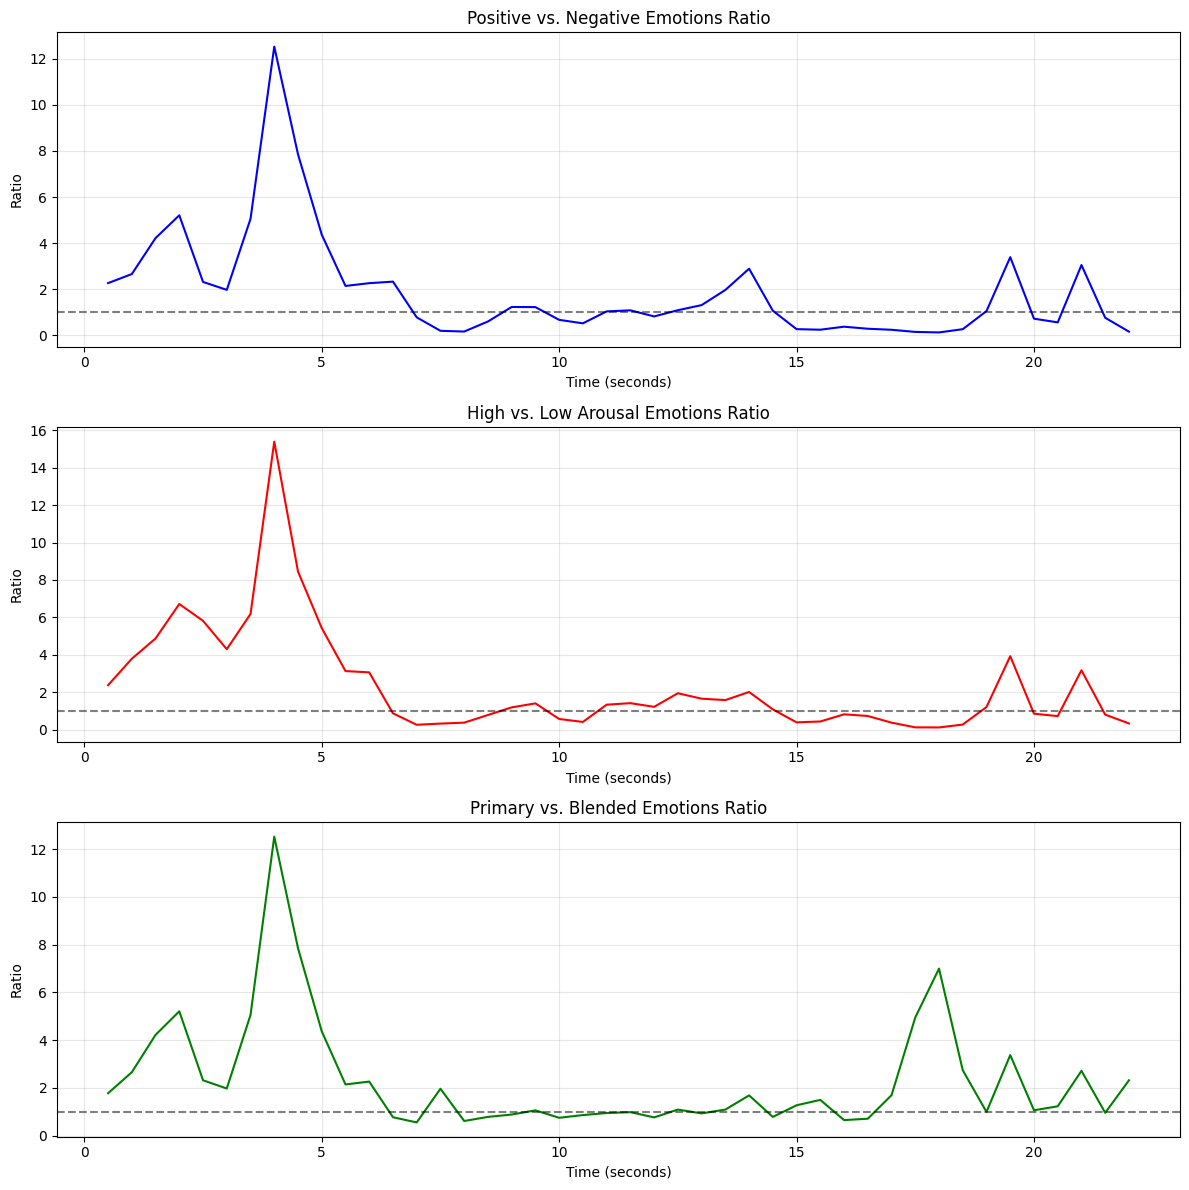

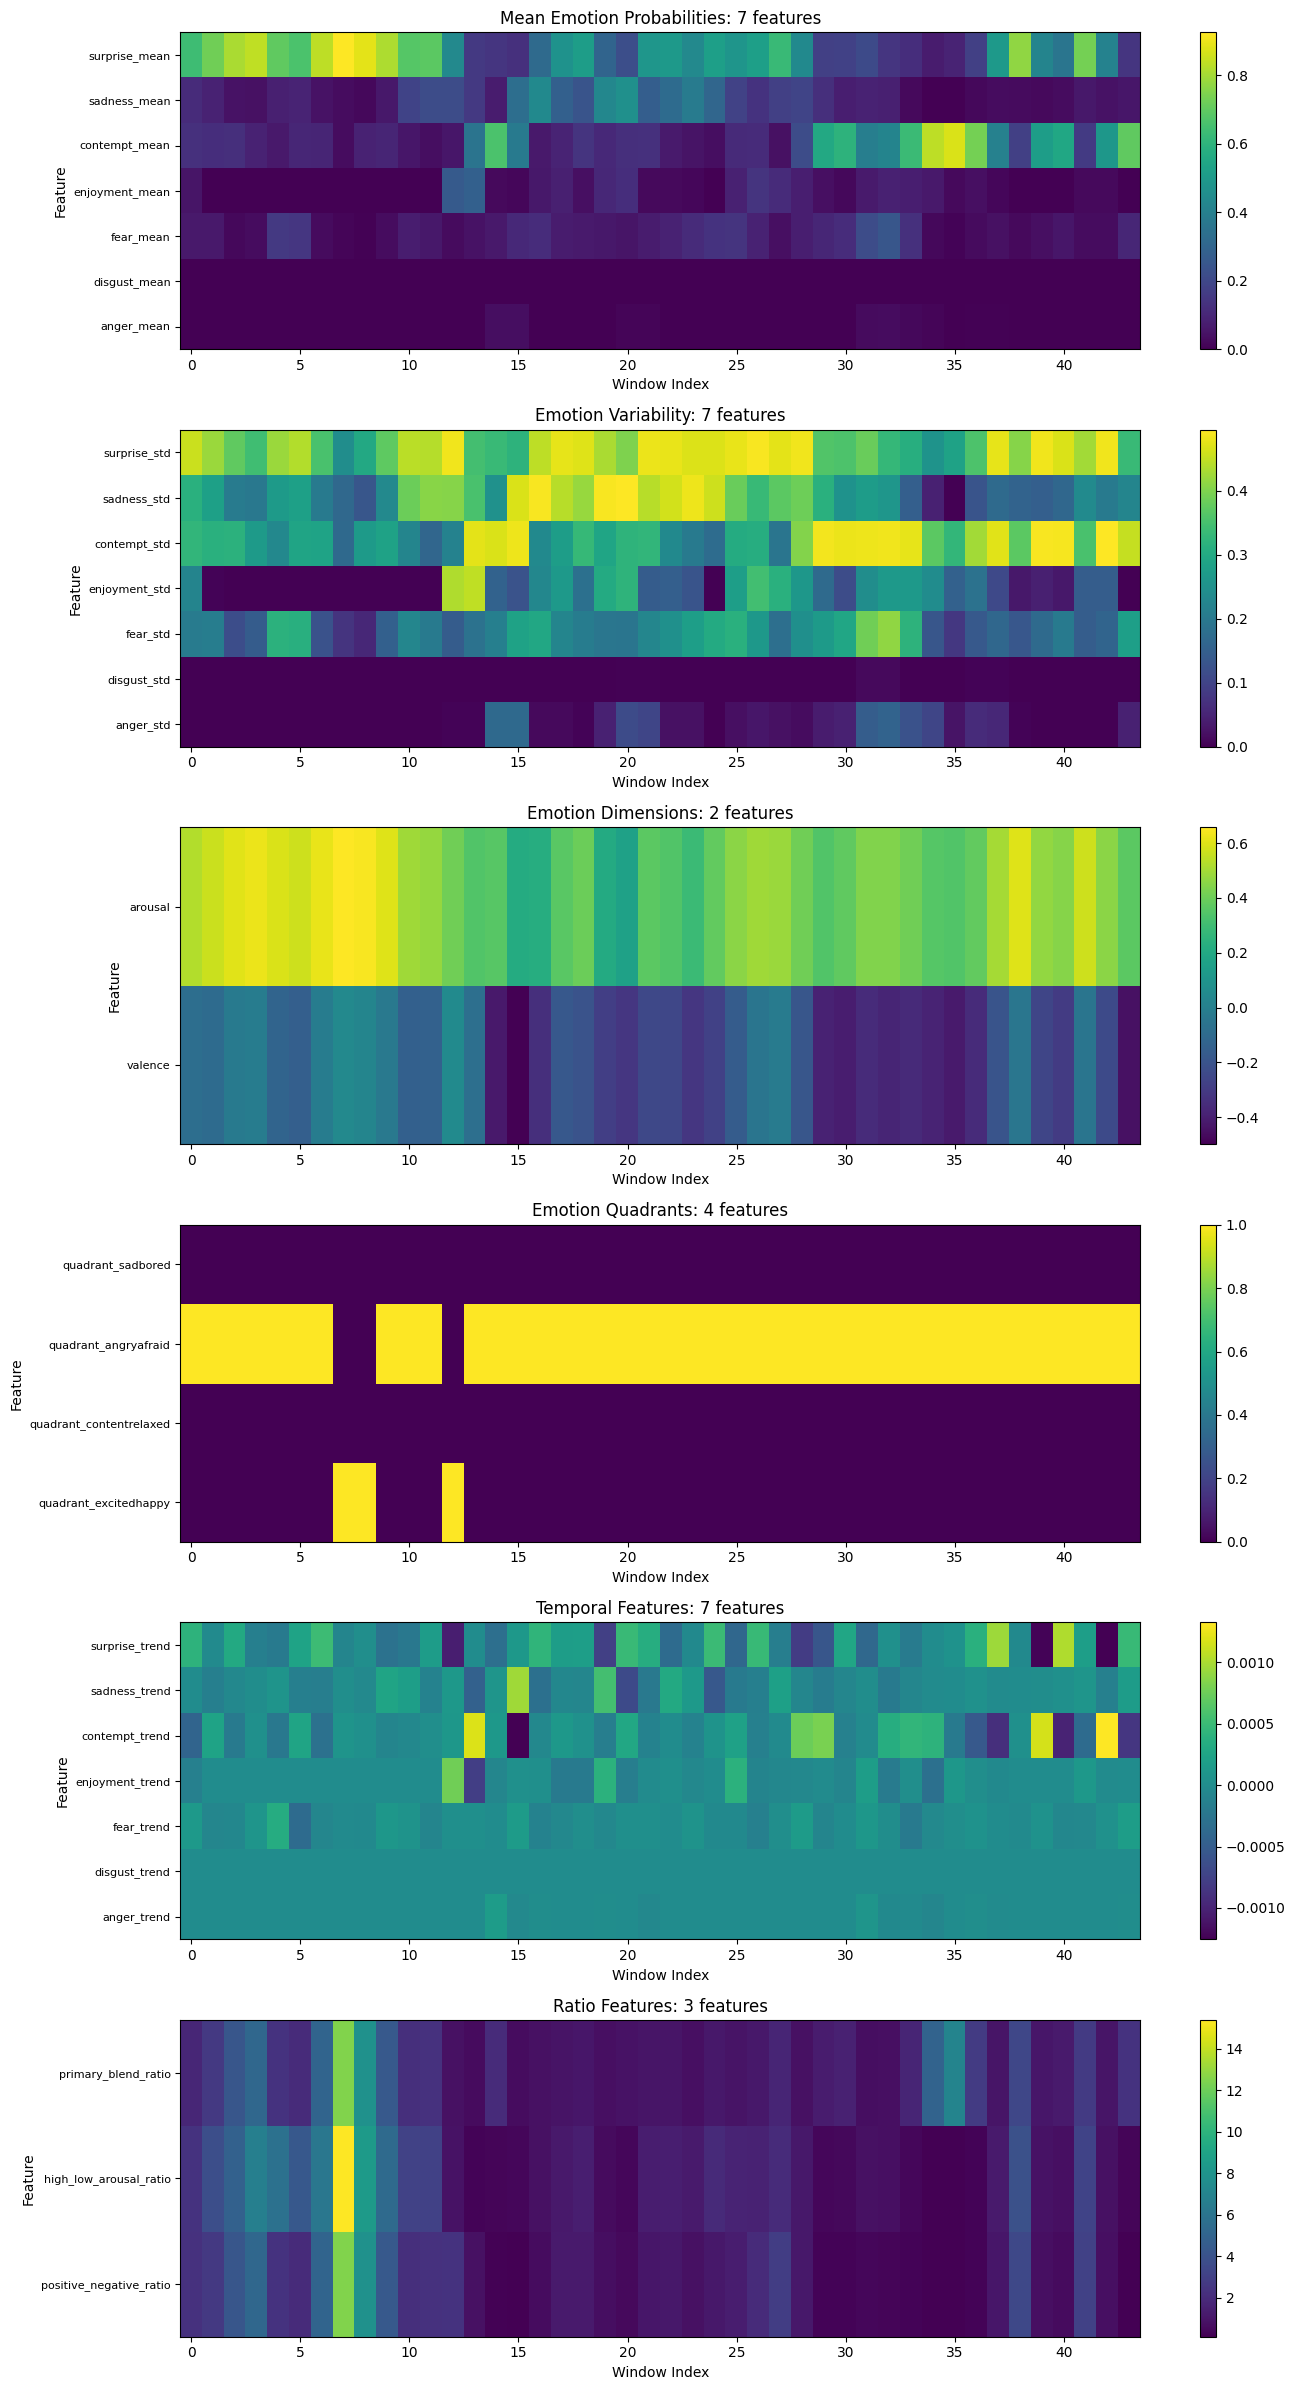

In [164]:
from scipy.stats import entropy


def normalize_features(features, method='zscore'):
    if method == 'zscore':
        return zscore(features, axis=0)
    
    elif method == 'minmax':
        # Min-max normalization to [0, 1]
        min_vals = np.min(features, axis=0)
        max_vals = np.max(features, axis=0)
        range_vals = max_vals - min_vals
        # Avoid division by zero
        range_vals[range_vals < 1e-10] = 1
        return (features - min_vals) / range_vals
    
    elif method == 'robust':
        # Robust scaling using median and interquartile range
        median = np.median(features, axis=0)
        q75, q25 = np.percentile(features, [75, 25], axis=0)
        iqr = q75 - q25
        # Avoid division by zero
        iqr[iqr < 1e-10] = 1
        return (features - median) / iqr
    
    else:
        # Return unmodified if method not recognized
        return features


def extract_face_features(face_emotions_flat, emotions_names, sampling_rate=1000, window_size=1.0, overlap=0.5, normalize=None):
    """
    Extract comprehensive features from facial emotion data using a sliding window approach
    
    Parameters:
    -----------
    face_emotions_flat : array, shape [n_samples, n_emotions]
        Array of emotion probabilities at 1000 fps
    emotions_names : list
        Names of the emotions corresponding to columns in face_emotions_flat
    sampling_rate : int, default=1000
        Sampling rate in frames per second
    window_size : float, default=1.0
        Window size in seconds
    overlap : float, default=0.5
        Window overlap proportion (0 to 1)
    
    Returns:
    --------
    features : array
        Extracted features for each window
    feature_names : list
        Names of the extracted features
    window_times : array
        Center time of each window in seconds
    """
    n_samples, n_emotions = face_emotions_flat.shape
    
    # Calculate window parameters in samples
    window_samples = int(window_size * sampling_rate)
    step_samples = int(window_samples * (1 - overlap))
    
    # Calculate number of windows
    n_windows = max(1, (n_samples - window_samples) // step_samples + 1)
    
    # Initialize feature array
    # We'll extract various feature types
    n_features_per_window = (
        n_emotions +     # Mean probabilities for each emotion
        n_emotions +     # Standard deviation for each emotion
        2 +              # Valence, arousal
        4 +              # Quadrants
        1 +              # Entropy
        1 +              # Dominant confidence
        n_emotions +     # Temporal: trend (slope) for each emotion
        3                # Key emotion ratios: positive/negative, high/low arousal, primary/blend
    )
    
    features = np.zeros((n_windows, n_features_per_window))
    window_times = np.zeros(n_windows)
    
    # 1. Valence-Arousal mappings
    valence_map = {
        'anger': -0.8, 'disgust': -0.6, 'fear': -0.7, 'enjoyment': 0.8,
        'contempt': -0.5, 'sadness': -0.7, 'surprise': 0.1
    }
    
    arousal_map = {
        'anger': 0.7, 'disgust': 0.3, 'fear': 0.7, 'enjoyment': 0.5,
        'contempt': 0.3, 'sadness': -0.3, 'surprise': 0.7
    }
    
    # Create lists for positive and negative emotions
    positive_emotions = ['enjoyment', 'surprise']
    negative_emotions = ['anger', 'disgust', 'fear', 'contempt', 'sadness']
    
    # Create lists for high and low arousal emotions
    high_arousal = ['anger', 'fear', 'surprise']
    low_arousal = ['disgust', 'enjoyment', 'contempt', 'sadness']
    
    # Process each window
    for i in range(n_windows):
        # Define window boundaries
        start_idx = i * step_samples
        end_idx = min(start_idx + window_samples, n_samples)
        window_times[i] = (start_idx + end_idx) / (2 * sampling_rate)  # window center time
        
        # Extract window data
        window_data = face_emotions_flat[start_idx:end_idx, :]
        
        feature_idx = 0
        
        # 1. Mean emotion probabilities over window
        emotion_means = np.mean(window_data, axis=0)
        for j in range(n_emotions):
            features[i, feature_idx] = emotion_means[j]
            feature_idx += 1
        
        # 2. Standard deviation of emotion probabilities
        emotion_stds = np.std(window_data, axis=0)
        for j in range(n_emotions):
            features[i, feature_idx] = emotion_stds[j]
            feature_idx += 1
        
        # 3. Calculate valence and arousal (mean across window)
        valence = 0
        arousal = 0
        for j, emotion in enumerate(emotions_names):
            valence += emotion_means[j] * valence_map[emotion]
            arousal += emotion_means[j] * arousal_map[emotion]
        
        features[i, feature_idx] = valence
        feature_idx += 1
        
        features[i, feature_idx] = arousal
        feature_idx += 1
        
        # 4. Quadrants (based on mean valence/arousal)
        features[i, feature_idx] = 1 if valence > 0 and arousal > 0 else 0  # High valence, high arousal
        feature_idx += 1
        
        features[i, feature_idx] = 1 if valence > 0 and arousal <= 0 else 0  # High valence, low arousal
        feature_idx += 1
        
        features[i, feature_idx] = 1 if valence <= 0 and arousal > 0 else 0  # Low valence, high arousal
        feature_idx += 1
        
        features[i, feature_idx] = 1 if valence <= 0 and arousal <= 0 else 0  # Low valence, low arousal
        feature_idx += 1
        
        # 5. Entropy of mean emotion distribution
        features[i, feature_idx] = entropy(emotion_means)
        feature_idx += 1
        
        # 6. Dominant emotion confidence
        features[i, feature_idx] = np.max(emotion_means)
        feature_idx += 1
        
        # 7. Trends (slopes) for each emotion over the window
        # Only calculate if we have enough samples
        if end_idx - start_idx > 1:
            x = np.arange(end_idx - start_idx)
            for j in range(n_emotions):
                y = window_data[:, j]
                
                # Calculate slope
                if np.std(y) > 1e-6:  # Check for variation
                    coef = np.polyfit(x, y, 1)
                    features[i, feature_idx] = coef[0]  # Slope
                # else slope stays 0
                feature_idx += 1
        else:
            # Skip slopes if not enough data
            feature_idx += n_emotions
        
        # 8. Key emotion ratios
        
        # Positive vs negative emotions ratio
        pos_sum = sum(emotion_means[j] for j, emotion in enumerate(emotions_names) if emotion in positive_emotions)
        neg_sum = sum(emotion_means[j] for j, emotion in enumerate(emotions_names) if emotion in negative_emotions)
        pos_neg_ratio = pos_sum / max(1e-6, neg_sum)  # Avoid division by zero
        features[i, feature_idx] = pos_neg_ratio
        feature_idx += 1
        
        # High vs low arousal ratio
        high_sum = sum(emotion_means[j] for j, emotion in enumerate(emotions_names) if emotion in high_arousal)
        low_sum = sum(emotion_means[j] for j, emotion in enumerate(emotions_names) if emotion in low_arousal)
        high_low_ratio = high_sum / max(1e-6, low_sum)  # Avoid division by zero
        features[i, feature_idx] = high_low_ratio
        feature_idx += 1
        
        # Primary emotion vs blended emotions ratio
        primary = np.max(emotion_means)
        secondary = np.sum(emotion_means) - primary
        primary_blend_ratio = primary / max(1e-6, secondary)  # Avoid division by zero
        features[i, feature_idx] = primary_blend_ratio
        feature_idx += 1
    
    # Create feature names list
    feature_names = []
    
    # 1. Mean emotion probabilities
    for emotion in emotions_names:
        feature_names.append(f"{emotion}_mean")
    
    # 2. Standard deviation of emotions
    for emotion in emotions_names:
        feature_names.append(f"{emotion}_std")
    
    # 3. Valence, arousal
    feature_names.extend(["valence", "arousal"])
    
    # 4. Quadrants
    feature_names.extend([
        "quadrant_excitedhappy",
        "quadrant_contentrelaxed",
        "quadrant_angryafraid",
        "quadrant_sadbored"
    ])
    
    # 5. Entropy
    feature_names.append("emotion_entropy")
    
    # 6. Dominant confidence
    feature_names.append("dominant_confidence")
    
    # 7. Trends
    for emotion in emotions_names:
        feature_names.append(f"{emotion}_trend")
    
    # 8. Key ratios
    feature_names.extend([
        "positive_negative_ratio",
        "high_low_arousal_ratio",
        "primary_blend_ratio"
    ])

    if normalize is not None:
        features = normalize_features(features, method=normalize)
    
    return features, feature_names, window_times



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import entropy


def visualize_raw_emotions(face_features, face_feature_names, window_times, emotions_names):
    """
    Visualize the window-averaged emotion probabilities over time.
    
    Parameters:
    -----------
    face_features : array
        Features array from extract_face_features()
    face_feature_names : list
        Feature names from extract_face_features()
    window_times : array
        Window center times in seconds
    emotions_names : list
        Names of the emotions
    """
    plt.figure(figsize=(12, 6))
    
    # Find indices for mean emotion probabilities
    emotion_mean_indices = []
    for emotion in emotions_names:
        feature_name = f"{emotion}_mean"
        emotion_mean_indices.append(face_feature_names.index(feature_name))
    
    # Plot mean emotion probabilities
    for i, emotion in enumerate(emotions_names):
        plt.plot(window_times, face_features[:, emotion_mean_indices[i]], label=emotion)
    
    plt.title("Mean Emotion Probabilities (1-second Windows)")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Mean Probability")
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt.gcf()


def visualize_dominant_emotions(face_features, face_feature_names, window_times, emotions_names):
    """
    Visualize the dominant emotions and related features.
    
    Parameters:
    -----------
    face_features : array
        Features array from extract_face_features()
    face_feature_names : list
        Feature names from extract_face_features()
    window_times : array
        Window center times in seconds
    emotions_names : list
        Names of the emotions
    """
    # Get indices for relevant features
    emotion_mean_indices = []
    for emotion in emotions_names:
        feature_name = f"{emotion}_mean"
        emotion_mean_indices.append(face_feature_names.index(feature_name))
    
    # Get index for entropy and dominant confidence
    entropy_idx = face_feature_names.index("emotion_entropy")
    dominant_confidence_idx = face_feature_names.index("dominant_confidence")
    
    # Find dominant emotions for each window
    dominant_emotions = np.argmax(face_features[:, emotion_mean_indices], axis=1)
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    
    # Plot 1: Dominant emotion over time
    for i, emotion in enumerate(emotions_names):
        mask = dominant_emotions == i
        if np.any(mask):
            scatter = axes[0].scatter(
                window_times[mask], 
                np.ones(np.sum(mask)) * i, 
                c=face_features[mask, dominant_confidence_idx], 
                cmap='viridis', 
                alpha=0.7, 
                s=50,
                label=emotion if i == 0 else "",
            )
    
    axes[0].set_yticks(range(len(emotions_names)))
    axes[0].set_yticklabels(emotions_names)
    axes[0].set_title("Dominant Emotion Over Time")
    axes[0].set_xlabel("Time (seconds)")
    axes[0].set_ylabel("Emotion")
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Confidence in dominant emotion
    axes[1].plot(window_times, face_features[:, dominant_confidence_idx], color='blue', alpha=0.7)
    axes[1].set_title("Confidence in Dominant Emotion")
    axes[1].set_xlabel("Time (seconds)")
    axes[1].set_ylabel("Probability")
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Entropy (uncertainty) of emotion distribution
    axes[2].plot(window_times, face_features[:, entropy_idx], color='red', alpha=0.7)
    axes[2].set_title("Emotion Distribution Entropy (Uncertainty)")
    axes[2].set_xlabel("Time (seconds)")
    axes[2].set_ylabel("Entropy (bits)")
    axes[2].grid(True, alpha=0.3)

    cbar = plt.colorbar(scatter, ax=axes[0])
    cbar.set_label('Time (seconds)')
    
    plt.tight_layout()
    return fig


def visualize_emotion_dimensions(face_features, face_feature_names, window_times, emotions_names):
    """
    Visualize the dimensional representation of emotions.
    
    Parameters:
    -----------
    face_features : array
        Features array from extract_face_features()
    face_feature_names : list
        Feature names from extract_face_features()
    window_times : array
        Window center times in seconds
    emotions_names : list
        Names of the emotions
    """
    # Get indices for relevant features
    valence_idx = face_feature_names.index("valence")
    arousal_idx = face_feature_names.index("arousal")
    
    # Quadrants
    quadrant_indices = []
    quadrant_names = ["quadrant_excitedhappy", "quadrant_contentrelaxed", 
                      "quadrant_angryafraid", "quadrant_sadbored"]
    
    for quadrant in quadrant_names:
        quadrant_indices.append(face_feature_names.index(quadrant))
    
    fig = plt.figure(figsize=(15, 12))
    gs = GridSpec(3, 2, figure=fig)
    
    # Plot 1: Valence over time
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(window_times, face_features[:, valence_idx], color='blue', alpha=0.7)
    ax1.set_title("Valence Over Time")
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Valence (negative to positive)")
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax1.set_ylim((-1, 1))
    
    # Plot 2: Arousal over time
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(window_times, face_features[:, arousal_idx], color='red', alpha=0.7)
    ax2.set_title("Arousal Over Time")
    ax2.set_xlabel("Time (seconds)")
    ax2.set_ylabel("Arousal (low to high)")
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.set_ylim((-1, 1))
    
    # Plot 3: Valence-Arousal space (with samples colored by time)
    ax3 = fig.add_subplot(gs[1, :])
    scatter = ax3.scatter(
        face_features[:, valence_idx], 
        face_features[:, arousal_idx], 
        c=window_times, 
        cmap='viridis', 
        alpha=0.7, 
        s=30
    )
    ax3.set_title("Emotion in Valence-Arousal Space")
    ax3.set_xlabel("Valence (negative to positive)")
    ax3.set_ylabel("Arousal (low to high)")
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax3.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    ax3.set_xlim((-1, 1))
    ax3.set_ylim((-1, 1))
    
    # Add quadrant labels
    ax3.text(0.75, 0.75, "Excited/Happy", ha='center', va='center', fontsize=12)
    ax3.text(0.75, -0.75, "Content/Relaxed", ha='center', va='center', fontsize=12)
    ax3.text(-0.75, 0.75, "Angry/Afraid", ha='center', va='center', fontsize=12)
    ax3.text(-0.75, -0.75, "Sad/Bored", ha='center', va='center', fontsize=12)
    
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('Time (seconds)')
    
    # Plot 4: Emotion quadrants over time
    ax4 = fig.add_subplot(gs[2, :])
    
    quadrant_display_names = ['Excited/Happy', 'Content/Relaxed', 'Angry/Afraid', 'Sad/Bored']
    for i, name in enumerate(quadrant_display_names):
        ax4.plot(window_times, face_features[:, quadrant_indices[i]], label=name, alpha=0.7)
    
    ax4.set_title("Emotion Quadrants Over Time")
    ax4.set_xlabel("Time (seconds)")
    ax4.set_ylabel("Quadrant Activation")
    ax4.legend(loc='upper right')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig


def visualize_temporal_features(face_features, face_feature_names, window_times, emotions_names):
    """
    Visualize temporal features of emotions.
    
    Parameters:
    -----------
    face_features : array
        Features array from extract_face_features()
    face_feature_names : list
        Feature names from extract_face_features()
    window_times : array
        Window center times in seconds
    emotions_names : list
        Names of the emotions
    """
    # Get indices for relevant features
    mean_indices = []
    std_indices = []
    trend_indices = []
    
    for emotion in emotions_names:
        mean_indices.append(face_feature_names.index(f"{emotion}_mean"))
        std_indices.append(face_feature_names.index(f"{emotion}_std"))
        trend_indices.append(face_feature_names.index(f"{emotion}_trend"))
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    
    # Plot 1: Mean emotion values
    for i, emotion in enumerate(emotions_names):
        axes[0].plot(window_times, face_features[:, mean_indices[i]], label=emotion)
    
    axes[0].set_title("Mean Emotion Values")
    axes[0].set_xlabel("Time (seconds)")
    axes[0].set_ylabel("Probability")
    axes[0].legend(loc='upper right')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Standard deviations
    for i, emotion in enumerate(emotions_names):
        axes[1].plot(window_times, face_features[:, std_indices[i]], label=f"{emotion}")
    
    axes[1].set_title("Emotion Variability (Standard Deviation)")
    axes[1].set_xlabel("Time (seconds)")
    axes[1].set_ylabel("Standard Deviation")
    axes[1].legend(loc='upper right')
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Trends (slopes)
    for i, emotion in enumerate(emotions_names):
        axes[2].plot(window_times, face_features[:, trend_indices[i]], label=f"{emotion}")
    
    axes[2].set_title("Emotion Trends (Slope)")
    axes[2].set_xlabel("Time (seconds)")
    axes[2].set_ylabel("Slope")
    axes[2].legend(loc='upper right')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig


def visualize_ratio_features(face_features, face_feature_names, window_times):
    """
    Visualize the key ratio features.
    
    Parameters:
    -----------
    face_features : array
        Features array from extract_face_features()
    face_feature_names : list
        Feature names from extract_face_features()
    window_times : array
        Window center times in seconds
    """
    # Get indices for ratio features
    pos_neg_idx = face_feature_names.index("positive_negative_ratio")
    arousal_idx = face_feature_names.index("high_low_arousal_ratio")
    primary_idx = face_feature_names.index("primary_blend_ratio")
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    
    # Plot 1: Positive vs. Negative emotions ratio
    axes[0].plot(window_times, face_features[:, pos_neg_idx], color='blue')
    axes[0].set_title("Positive vs. Negative Emotions Ratio")
    axes[0].set_xlabel("Time (seconds)")
    axes[0].set_ylabel("Ratio")
    axes[0].axhline(y=1, color='black', linestyle='--', alpha=0.5)
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: High vs. Low Arousal ratio
    axes[1].plot(window_times, face_features[:, arousal_idx], color='red')
    axes[1].set_title("High vs. Low Arousal Emotions Ratio")
    axes[1].set_xlabel("Time (seconds)")
    axes[1].set_ylabel("Ratio")
    axes[1].axhline(y=1, color='black', linestyle='--', alpha=0.5)
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Primary vs. Blended emotions ratio
    axes[2].plot(window_times, face_features[:, primary_idx], color='green')
    axes[2].set_title("Primary vs. Blended Emotions Ratio")
    axes[2].set_xlabel("Time (seconds)")
    axes[2].set_ylabel("Ratio")
    axes[2].axhline(y=1, color='black', linestyle='--', alpha=0.5)
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig


def visualize_feature_comparisons(face_features, face_feature_names, window_times, emotions_names):
    """
    Compare different feature sets from the extracted face features.
    
    Parameters:
    -----------
    face_features : array
        Features array from extract_face_features()
    face_feature_names : list
        Feature names from extract_face_features()
    window_times : array
        Window center times in seconds
    emotions_names : list
        Names of the emotions
    """
    # Define feature groups
    feature_groups = {
        "Mean Emotion Probabilities": [f"{emotion}_mean" for emotion in emotions_names],
        "Emotion Variability": [f"{emotion}_std" for emotion in emotions_names],
        "Emotion Dimensions": ["valence", "arousal"],
        "Emotion Quadrants": ["quadrant_excitedhappy", "quadrant_contentrelaxed", 
                             "quadrant_angryafraid", "quadrant_sadbored"],
        "Temporal Features": [f"{emotion}_trend" for emotion in emotions_names],
        "Ratio Features": ["positive_negative_ratio", "high_low_arousal_ratio", "primary_blend_ratio"]
    }
    
    # Create heatmap for each feature group
    fig, axes = plt.subplots(len(feature_groups), 1, figsize=(14, 4 * len(feature_groups)))
    
    for i, (group_name, feature_list) in enumerate(feature_groups.items()):
        # Get indices for this feature group
        feature_indices = [face_feature_names.index(feature) for feature in feature_list]
        
        # Extract subset of features
        feature_subset = face_features[:, feature_indices]
        
        # Create heatmap
        im = axes[i].imshow(feature_subset.T, aspect='auto', cmap='viridis', 
                           interpolation='nearest', origin='lower')
        
        # Set labels
        axes[i].set_title(f"{group_name}: {feature_subset.shape[1]} features")
        axes[i].set_xlabel("Window Index")
        axes[i].set_ylabel("Feature")
        
        # Set y-tick labels to feature names
        axes[i].set_yticks(range(len(feature_list)))
        axes[i].set_yticklabels(feature_list, fontsize=8)
        
        # Add colorbar
        plt.colorbar(im, ax=axes[i])
    
    plt.tight_layout()
    return fig

# Define emotion names
emotions_names = ['anger', 'disgust', 'fear', 'enjoyment', 'contempt', 'sadness', 'surprise']

face_features, face_feature_names, window_times = extract_face_features(
    face_emotions_flat, 
    emotions_names, 
    sampling_rate=1000, 
    window_size=1.0,
    overlap=0.5
)

print(face_features.shape, len(face_feature_names))
print(face_feature_names)

fig1 = visualize_raw_emotions(face_features, face_feature_names, window_times, emotions_names)
fig2 = visualize_dominant_emotions(face_features, face_feature_names, window_times, emotions_names)
fig3 = visualize_emotion_dimensions(face_features, face_feature_names, window_times, emotions_names)
fig4 = visualize_temporal_features(face_features, face_feature_names, window_times, emotions_names)
fig5 = visualize_ratio_features(face_features, face_feature_names, window_times)
fig6 = visualize_feature_comparisons(face_features, face_feature_names, window_times, emotions_names)